# 1st Assignment: Mesurements

In [2]:
import os
import networkx as nx
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns
import collections
import operator
%matplotlib  

Using matplotlib backend: Qt5Agg


In [3]:
def calculate_measure(G):
    print(nx.info(G))

    betweenness = nx.betweenness_centrality(G, normalized=True).values() 
    closeness = nx.closeness_centrality(G).values()
    
    print("Number of isolated nodes: ", nx.number_of_isolates(G))

    if G.is_directed():
        calc_measure_dir(G)
    else:
        giant_component= sorted(nx.connected_component_subgraphs(G), key = len, reverse=True)
        print("Size of biggest GCC (nodes, edges):", giant_component[0].order(), giant_component[0].size())
        
    print("Max betweeness centrality: ", np.max(np.array(list(betweenness))))
    print("Average betweenness centrality", np.mean(np.array(list(betweenness))))
    print("Average closeness centrality", np.mean(np.array(list(closeness))))
    print("Max closeness centrality: ", np.max(np.array(list(closeness))))
    print("Average clustering", nx.average_clustering(G.to_undirected()))
    print("Assortativity measures: \n Coeff: ", nx.degree_assortativity_coefficient(G))
    
    
def calc_measure_dir(G):
   
    s_components = sorted(nx.strongly_connected_component_subgraphs(G), key = len, reverse=True)
    w_components = sorted(nx.weakly_connected_component_subgraphs(G), key = len, reverse=True)
    print("Number of strongly connected components(SCC): ", nx.number_strongly_connected_components(G))
    print("Size of biggest SCC (nodes, edges):", s_components[0].order(), s_components[0].size())
    print("Biggest SCC Diameter: ", nx.diameter(s_components[0]))
    print("Biggest SCC Average Shortest Path", nx.average_shortest_path_length(s_components[0]))
    print("Number of weakly connected components: ", nx.number_weakly_connected_components(G))
    print("Size of biggest WCC (nodes, edges):", w_components[0].order(), w_components[0].size())
    #print("Biggest WCC Diameter: ", nx.diameter(w_components[0]))
    print("Biggest WCC Average Shortest Path", nx.average_shortest_path_length(w_components[0])) 

In [3]:
bitcoin_graph = nx.DiGraph()
with open('bitcoinotc.csv', newline='') as csvfile:
     bitcoin = csv.reader(csvfile, delimiter=',') 
     for row in bitcoin:
        bitcoin_graph.add_edge(int(row[0]), int(row[1])) 

In [1]:
#plot graph indegree+outdegree
plt.figure(figsize=(15,15)) 
nx.draw(bitcoin_graph, alpha=0.4, edge_color='blue', node_color='orange', node_size=[v * 100 for v in dict(bitcoin_graph.degree()).values()])

NameError: name 'plt' is not defined

In [18]:
bitcoin_graph.name='Bitcoin'
calculate_measure(bitcoin_graph)

Nodes:  5881
Edges:  35592
Average degree:  6.052031967352491
Number of isolated nodes:  0
Size of biggest GCC (nodes, edges): 5875 21489
Max betweeness centrality:  0.14211022254570446
Average betweenness centrality 0.0003702558051341835
Average closeness centrality 0.21886032391814375
Max closeness centrality:  0.3393980425132191
Average clustering 0.17750449405289517
Assortativity measures: 
 Coeff:  -0.16395371492959177
Number of strongly connected components(SCC):  1144
Size of biggest SCC (nodes, edges): 4709 33461
Biggest SCC Diameter:  11
Biggest SCC Average Shortest Path 3.6783550290455937
Number of weakly connected components:  4
Size of biggest WCC (nodes, edges): 5875 35587
Biggest WCC Average Shortest Path 2.9834084280529414


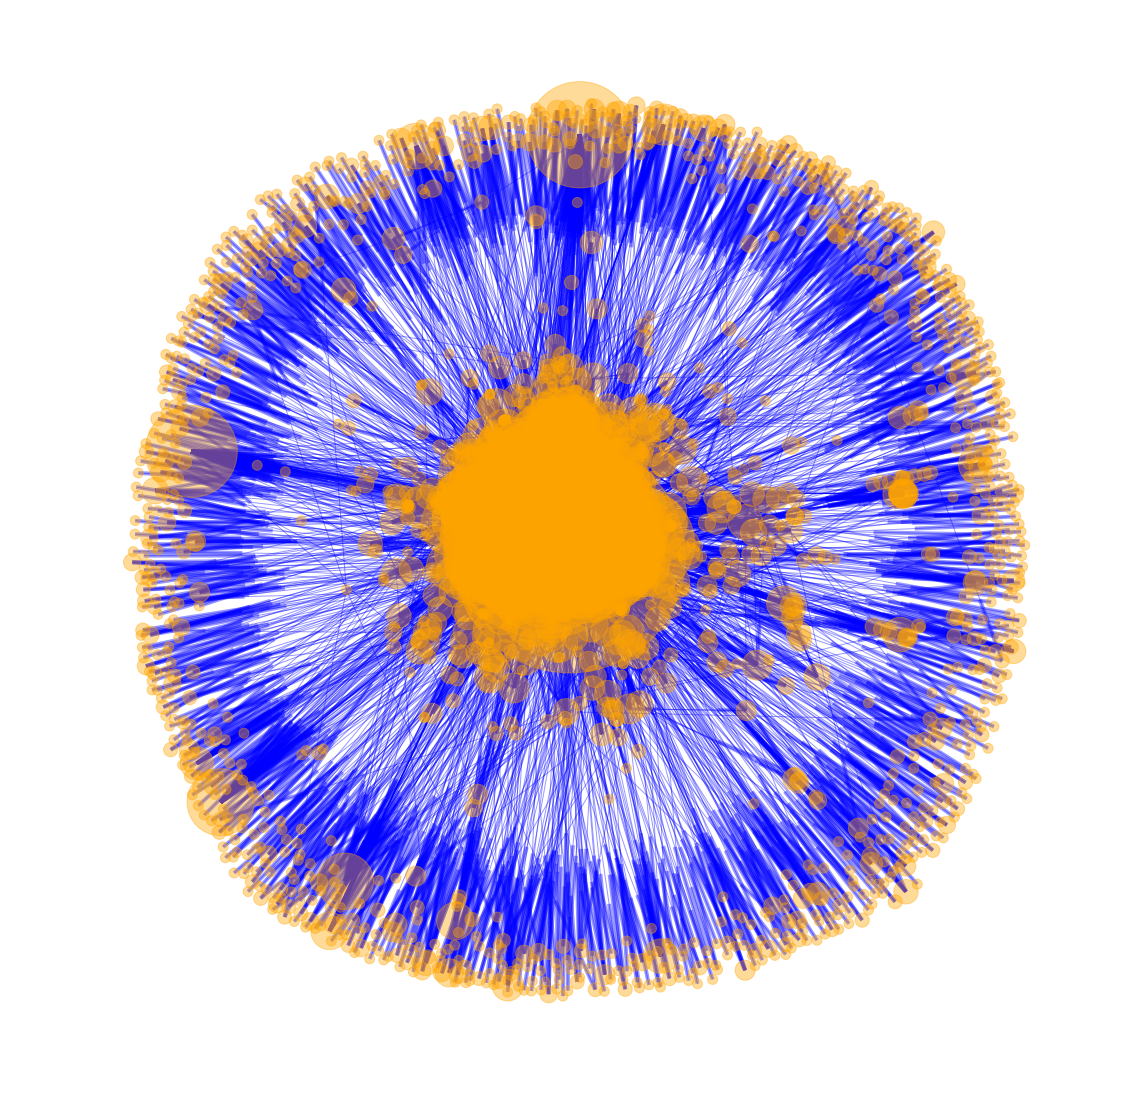

In [12]:
plt.figure(figsize=(15,15))
#plot in_degree
nx.draw(bitcoin_graph, alpha=0.4, edge_color='blue', node_color='orange', node_size=[v * 100 for v in dict(bitcoin_graph.in_degree()).values()])


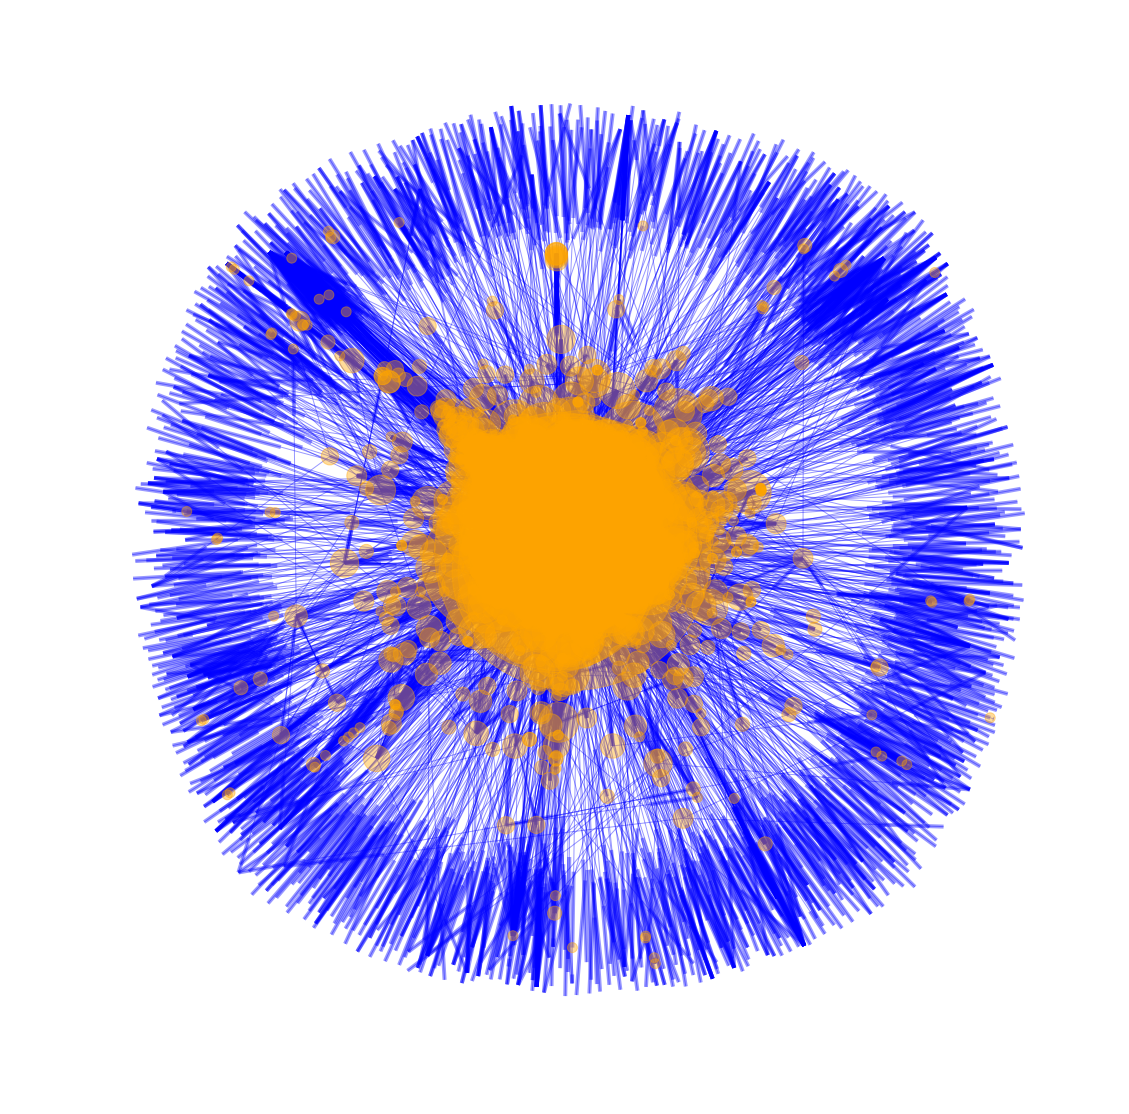

In [13]:
plt.figure(figsize=(15,15))
#plot out_degree
nx.draw(G, alpha=0.4, edge_color='blue', node_color='orange', node_size=[v * 100 for v in dict(bitcoin_graph.out_degree()).values()])

In [96]:
def plot_degree_distribution(degrees, title, degreesOut=dict()):
    
    #degrees= dict(G.degree())
    N=len(degrees)
    hist = [list(degrees.values()).count(x)/N for x in degrees.values()]
    fig = plt.figure(figsize=(17,17))
    plt.title(title)
    plt.grid(True)
    sns.set_style("ticks") 
    ax=plt.gca()
    ax.set_xscale('log')
    ax.set_xlabel('Degree')
    ax.set_ylabel('$p_k$')
    if degreesOut:
        histOut = [list(degreesOut.values()).count(x)/N for x in degreesOut.values()]
        ax.plot(degrees.values(), hist, alpha=0.4,color='green',marker='o',linestyle=None, linewidth = 0) 
        ax.plot(degreesOut.values(), histOut,alpha=0.4, color='orange',marker='o',linestyle=None, linewidth = 0) 
        ax.legend(['In-degree', 'Out-degree'])
    else:
         plt.scatter(degrees.values(), hist, color='orange') 

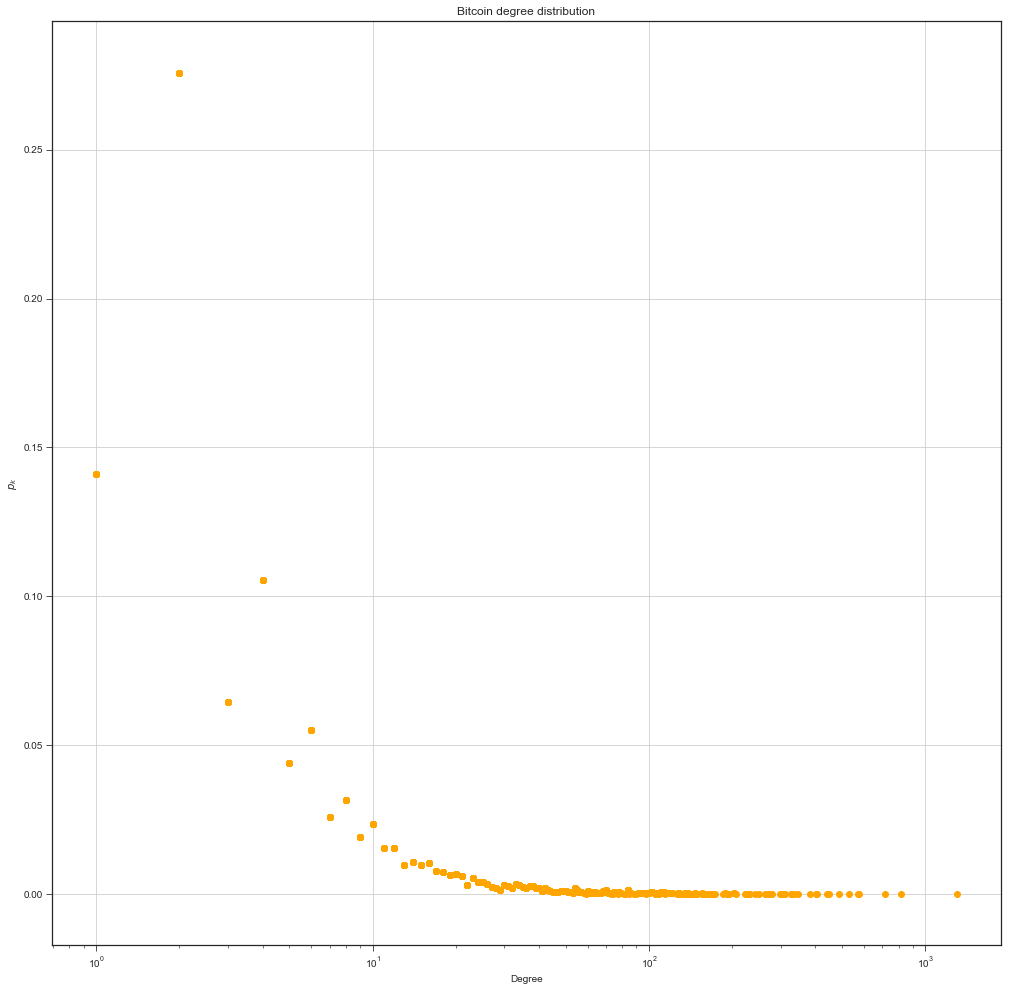

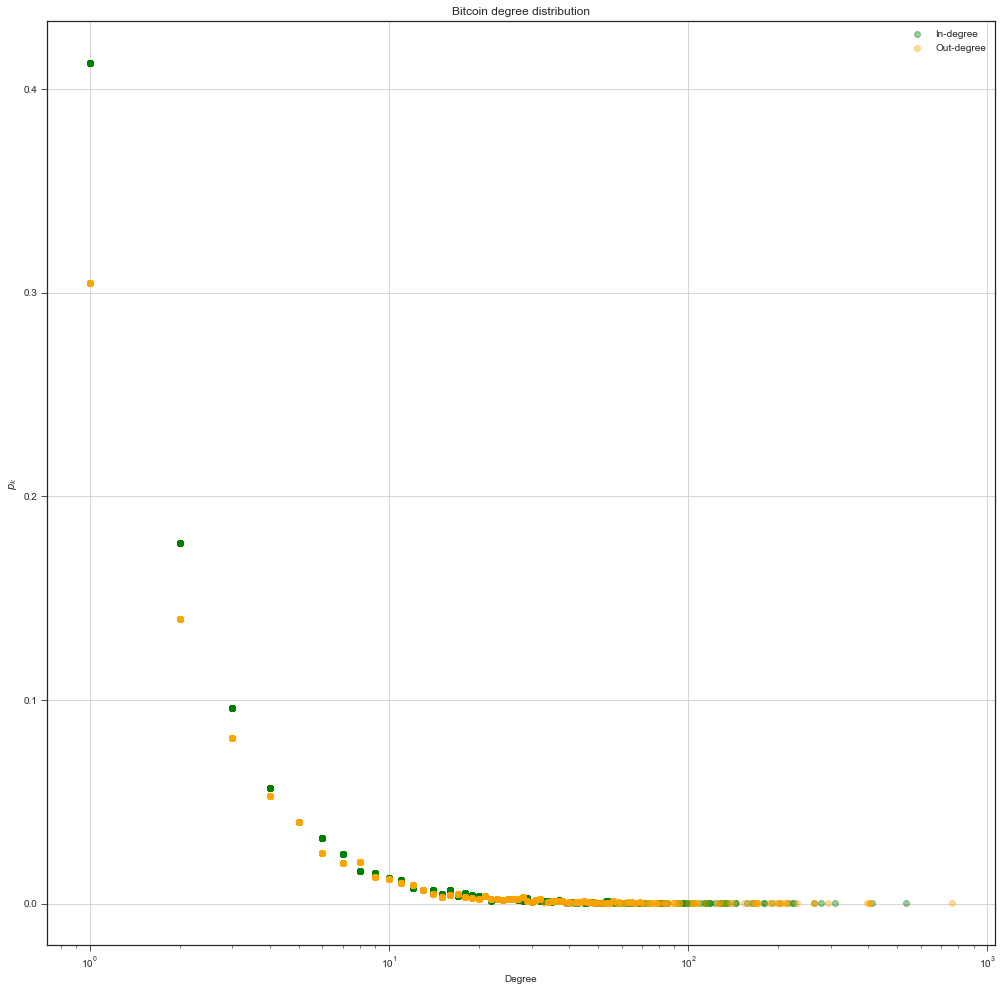

In [97]:
degrees= dict(bitcoin_graph.degree())
in_degrees= dict(bitcoin_graph.in_degree())
out_degrees= dict(bitcoin_graph.out_degree())
plot_degree_distribution(degrees, "Bitcoin degree distribution")
plot_degree_distribution(in_degrees, "Bitcoin degree distribution", out_degrees)

# 3rd Assignment: Attack

In [4]:
barabasi_graph= nx.barabasi_albert_graph(1000,5,seed=None)
erdos_renyi= nx.gnp_random_graph(1000,0.01,seed=None)

In [4]:
plt.figure(figsize=(5,5))
nx.draw(barabasi_graph, alpha=0.6, edge_color='blue', node_color='orange', node_size=[v * 100 for v in dict(barabasi_graph.degree()).values()])

barabasi_graph.name='Barabasi Albert'
calculate_measure(barabasi_graph)

NameError: name 'barabasi_graph' is not defined

Name: Erdos Renyi
Type: Graph
Number of nodes: 1000
Number of edges: 5009
Average degree:  10.0180
Number of isolated nodes:  0
Size of biggest GCC (nodes, edges): 1000 5009
Max betweeness centrality:  0.01045960718669858
Average betweenness centrality 0.0022580937651077927
Average closeness centrality 0.3080527475131498
Max closeness centrality:  0.3499124343257443
Average clustering 0.011219214695207431
Assortativity measures: 
 Coeff:  -0.02405050449065145


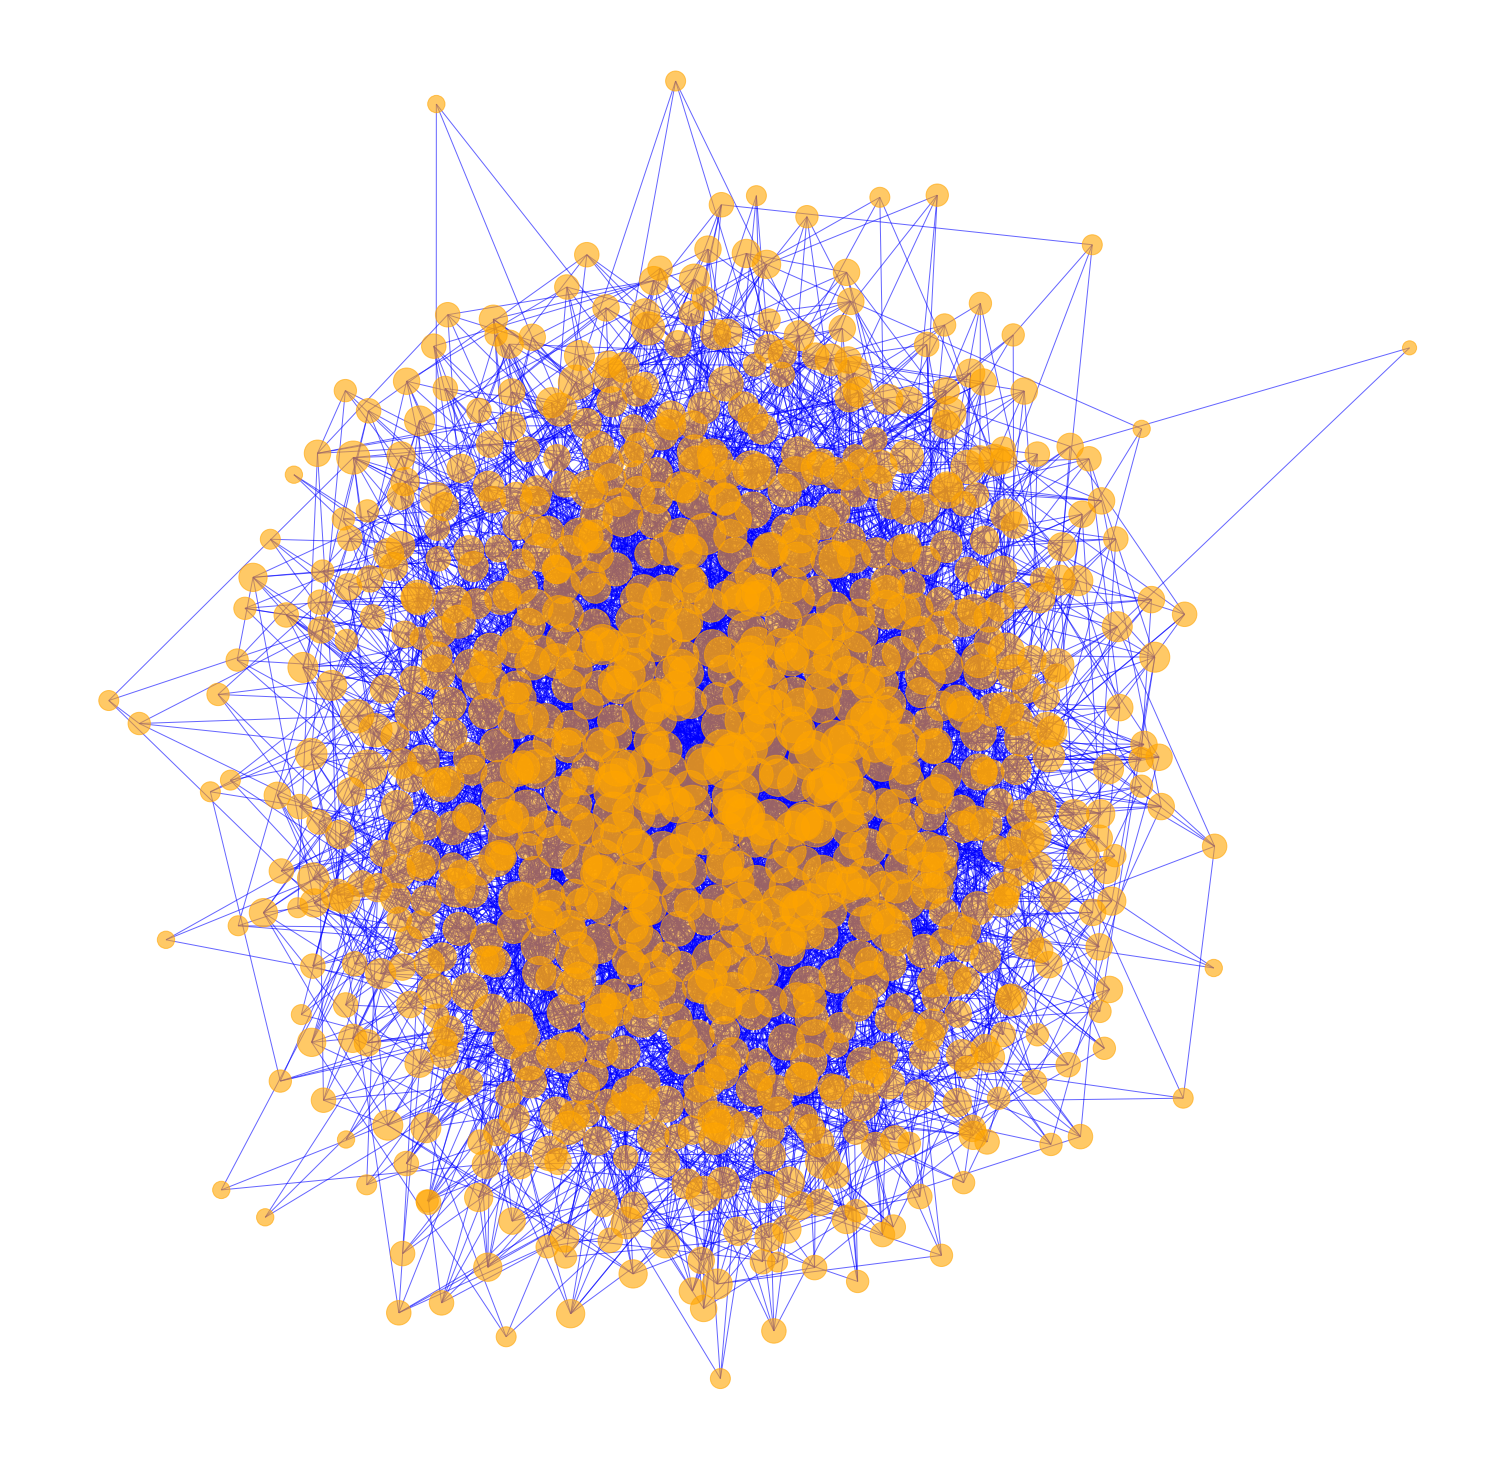

In [73]:
plt.figure(figsize=(20,20))
nx.draw(erdos_renyi, alpha=0.6, edge_color='blue', node_color='orange', node_size=[v * 100 for v in dict(erdos_renyi.degree()).values()])

erdos_renyi.name='Erdos Renyi'
calculate_measure(erdos_renyi)

In [113]:
def plot_bar_distribution(degrees, title):

    hist = [list(degrees.values()).count(x) for x in degrees.values()]
    fig = plt.figure(figsize=(12,12))
    plt.title(title + " degree distribution")
    plt.grid(True)
    sns.set_style("ticks")
    plt.bar(degrees.values(), hist, color='blue') # in-degree

def deg_dist(G):
    
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
    # print "Degree sequence", degree_sequence
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())
    return deg, cnt

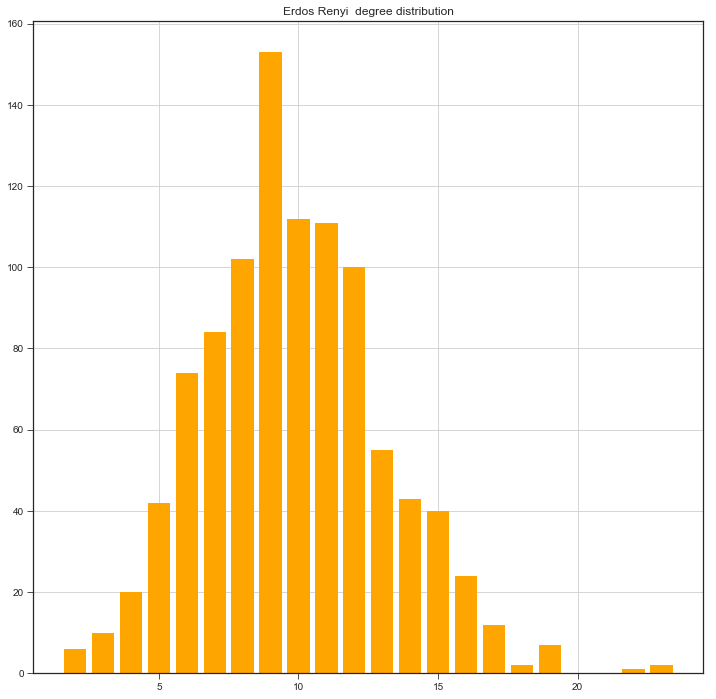

In [111]:
degrees= dict(erdos_renyi.degree())
plot_bar_distribution(degrees, "Erdos Renyi ") 

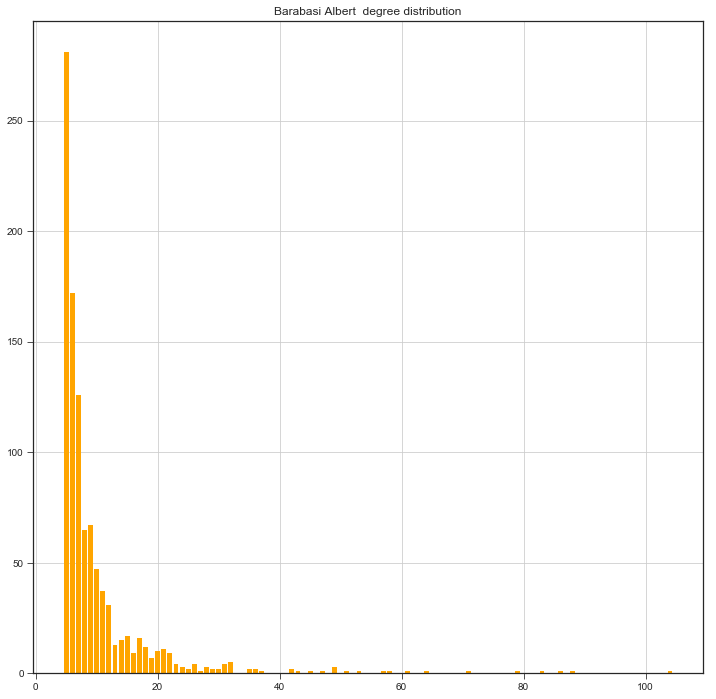

In [112]:
degrees= dict(barabasi_graph.degree())
plot_bar_distribution(degrees, "Barabasi Albert ")

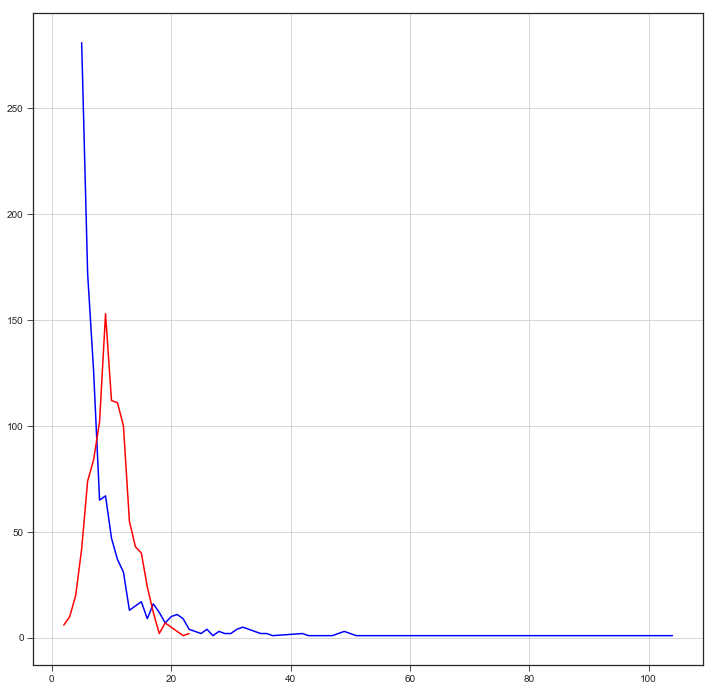

In [114]:
fig = plt.figure(figsize=(12,12))
degB, cntB = deg_dist(barabasi_graph)
degE, cntE = deg_dist(erdos_renyi)

plt.grid(True)
plt.plot(degB, cntB, color='b')
plt.plot(degE, cntE, color='r')

In [15]:
#following slide y=-logk(P(k))
import math
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

def regression(G):
    ambo=np.random.permutation([(math.log(v), math.log(list(dict(G.degree).values()).count(v)/len(G))) for (k,v) in dict(G.degree()).items()])
    degree_log=[[x] for (x,y) in ambo]# degree x
    freq_log=[y for (x,y) in ambo]# degree y

    diabetes = datasets.load_diabetes()
    diabetes_X = diabetes.data[:, np.newaxis, 2]

    diabetes_X_train = degree_log
    #actually visualized and result of prediction,
    ##if too small does not accurately represent graph, 
    ###if too big prediction is falsed, cause training too small
    #diabetes_X_test = degree_log[span:]

    diabetes_y_train = freq_log
    #diabetes_y_test = freq_log[span:]
    #print(diabetes_X_test)

    regr = linear_model.LinearRegression()
    regr.fit(diabetes_X_train, diabetes_y_train)#train part

    y_pred = regr.predict(diabetes_X_train)#get prediction from train schema on test values

    # The coefficients
    print('Coefficients: \n', -regr.coef_) #famosa y compresa tra 2 e 3, 
    # The mean squared error
    print("Mean squared error: %.2f"
          % mean_squared_error(diabetes_y_train, y_pred))
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % r2_score(diabetes_y_train, y_pred))

    plt.figure(figsize=(10,10))
    plt.scatter(diabetes_X_train, diabetes_y_train)
    plt.plot(diabetes_X_train, y_pred, color='orange', linewidth=2)

    return -regr.coef_[0]

    

Coefficients: 
 [2.42779635]
Mean squared error: 0.07
Variance score: 0.96


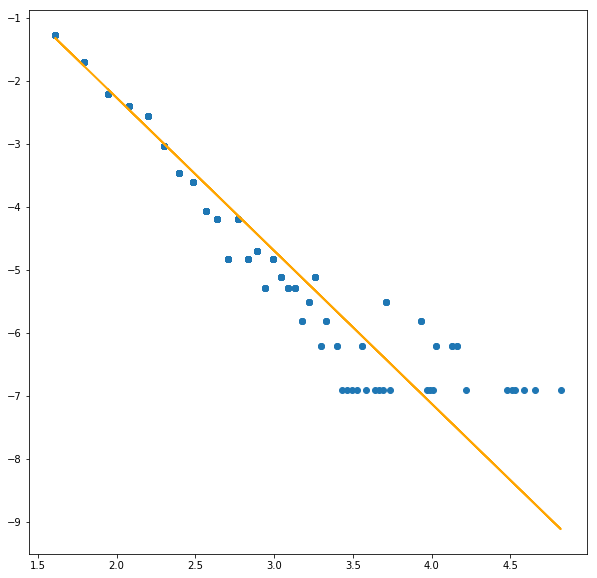

In [38]:
Y=regression(barabasi_graph)

Coefficients: 
 [1.3554365]
Mean squared error: 0.34
Variance score: 0.88


1.355436497078359

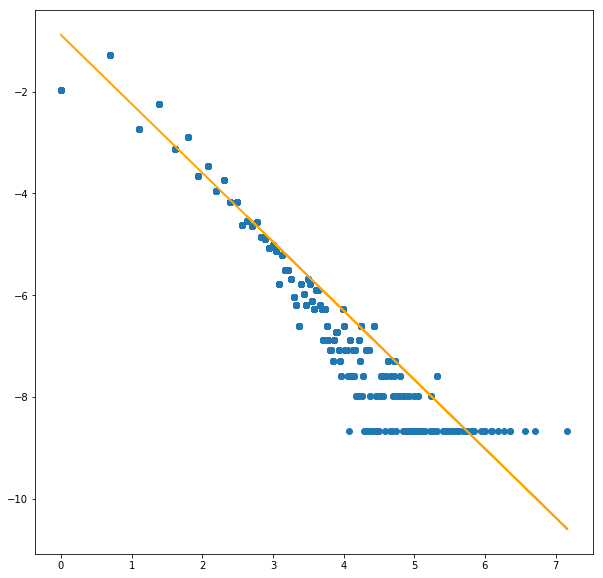

In [50]:
regression(bitcoin_graph)#serve? boh shows that bitcoin is not scale free.

In [2]:
def attack_compute(subgraphs, gcc_0, gcc_list, deg_avg_list, dm_list):
    gcc_i=subgraphs[0]
    gcc_list.append(len(gcc_i)/len(gcc_0))# node percentage copared to original gcc, at first 100%
    deg_avg_list.append(np.sum([len(cluster) for cluster in subgraphs ])/len(subgraphs))# avg numbers of nodes in all components
    dm_list.append(nx.diameter(gcc_i))#diameter    
    

def attack_graph(G, nodes_to_remove, step):
    
    my_graph = G.copy()
    N_nodes = len(nodes_to_remove)
    step = int(step * N_nodes)
    
    subgraphs_split=nx.strongly_connected_component_subgraphs if my_graph.is_directed() else nx.connected_component_subgraphs
    subgraphs=sorted(subgraphs_split(my_graph), key=len, reverse=True)
    # first gcc or scc
    gcc_0=subgraphs[0]
    
    #init measures, initiliazed with values from not modified gcc/scc
    gcc_list=list()
    deg_avg_list=list()
    dm_list=list()
    attack_compute(subgraphs, gcc_0, gcc_list, deg_avg_list, dm_list)

    #begins attack
    for i in range(0,N_nodes,step):
        
        my_graph.remove_nodes_from(nodes_to_remove[i:i+step])
        subgraphs = sorted(subgraphs_split(my_graph), key=len, reverse=True)
        
        if len(subgraphs) != 0:
            attack_compute(subgraphs, gcc_0, gcc_list, deg_avg_list, dm_list)

    return gcc_list,deg_avg_list,dm_list

In [3]:
def plot_attack(plot1, plot2, plot3, step, ylabel, xlabel, flag, plot4=[]): #flag=1 plot gcc
    plt.figure(figsize=(12,12))
    plt.plot(np.arange(0,1,step), plot1,'o-b',label='Random failures')
    plt.plot(np.arange(0,1,step), plot2,'^-r',label='Highest degree attack')
    plt.plot(np.arange(0,1,step), plot3,'x-y',label='Highest clustering attack')
    if plot4:
        plt.plot(np.arange(0,1,step), plot4,'+-g',label='Highest betweenness attack')
    if flag: #gcc
        plt.plot(np.arange(0,1,step), np.linspace(1,0,len(plot1),endpoint='True'),color='black',label='Ideal case')
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.legend()

    plt.grid()



# - Barabasi Attack

In [5]:
step = 0.01 # 10 nodes at time
gcc_l1,deg_l1,dm_l1 = attack_graph(barabasi_graph,np.random.permutation(barabasi_graph.nodes()),step) # 25% passo 5%
gcc_l2,deg_l2,dm_l2 = attack_graph(barabasi_graph, [x for (x,y) in sorted(barabasi_graph.degree(), key=operator.itemgetter(1), reverse=True)],step) # 1% passo 1
gcc_l3,deg_l3,dm_l3 = attack_graph(barabasi_graph, [x for (x,y) in sorted(nx.clustering(barabasi_graph).items(), key=operator.itemgetter(1), reverse=True)],step) # 1% passo 1
gcc_l4,deg_l4,dm_l4 = attack_graph(barabasi_graph, [x for (x,y) in sorted(nx.betweenness_centrality(barabasi_graph, normalized=True).items(), key=operator.itemgetter(1), reverse=True)],step) # 1% passo 1


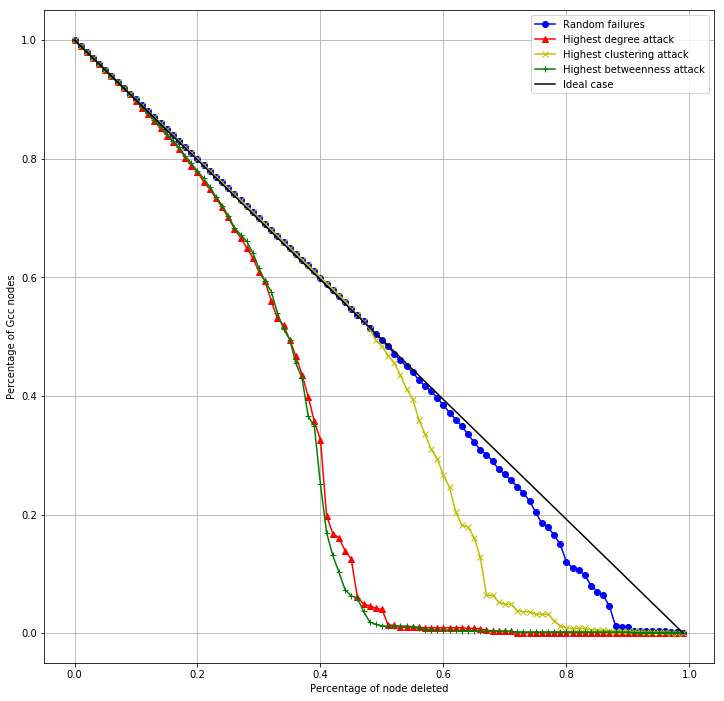

In [6]:
plot_attack(gcc_l1, gcc_l2, gcc_l3, step, "Percentage of Gcc nodes","Percentage of node deleted",1, gcc_l4)

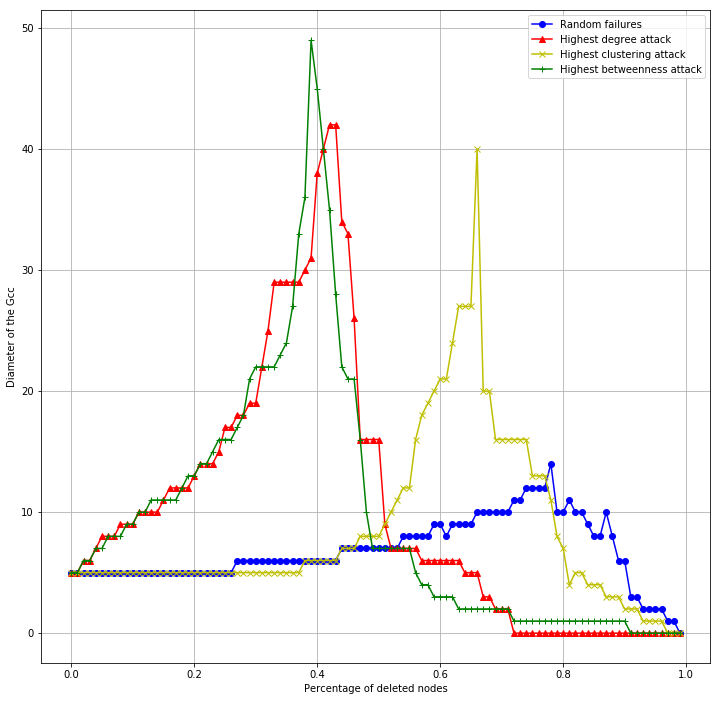

In [7]:
plot_attack(dm_l1, dm_l2, dm_l3, step, "Diameter of the Gcc","Percentage of deleted nodes", 0, dm_l4)

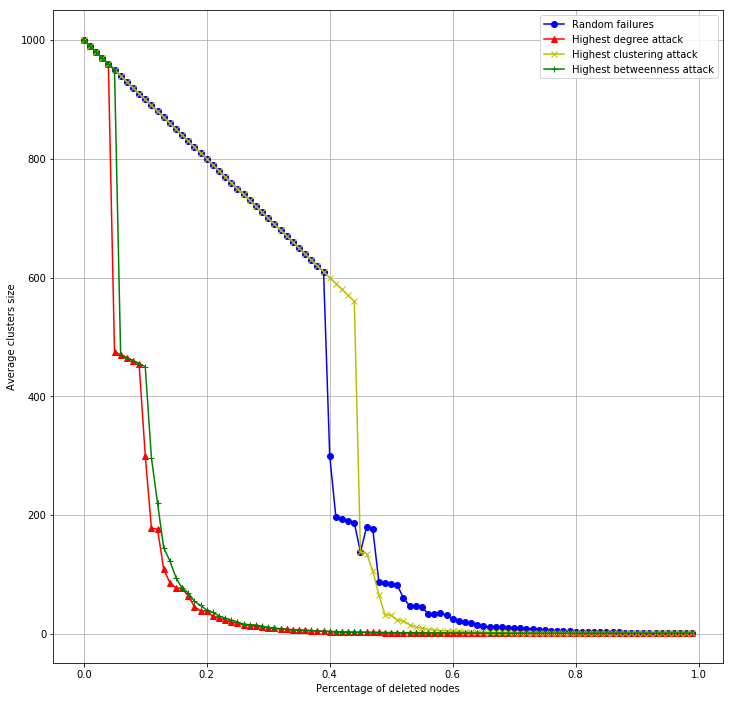

In [8]:
plot_attack(deg_l1, deg_l2, deg_l3, step, "Average clusters size","Percentage of deleted nodes", 0, deg_l4)

# - Erdos-Renyi Attack

In [261]:
step = 0.01 # 10 nodes at time
gcc_l1,deg_l1,dm_l1 = attack_graph(erdos_renyi,np.random.permutation(erdos_renyi.nodes()),step) # 25% passo 5%
gcc_l2,deg_l2,dm_l2 = attack_graph(erdos_renyi, [x for (x,y) in sorted(erdos_renyi.degree(), key=operator.itemgetter(1), reverse=True)],step) # 1% passo 1
gcc_l3,deg_l3,dm_l3 = attack_graph(erdos_renyi, [x for (x,y) in sorted(nx.clustering(erdos_renyi).items(), key=operator.itemgetter(1), reverse=True)],step) # 1% passo 1
gcc_l4,deg_l4,dm_l4 = attack_graph(erdos_renyi, [x for (x,y) in sorted(nx.betweenness_centrality(erdos_renyi).items(), key=operator.itemgetter(1), reverse=True)],step) # 1% passo 1



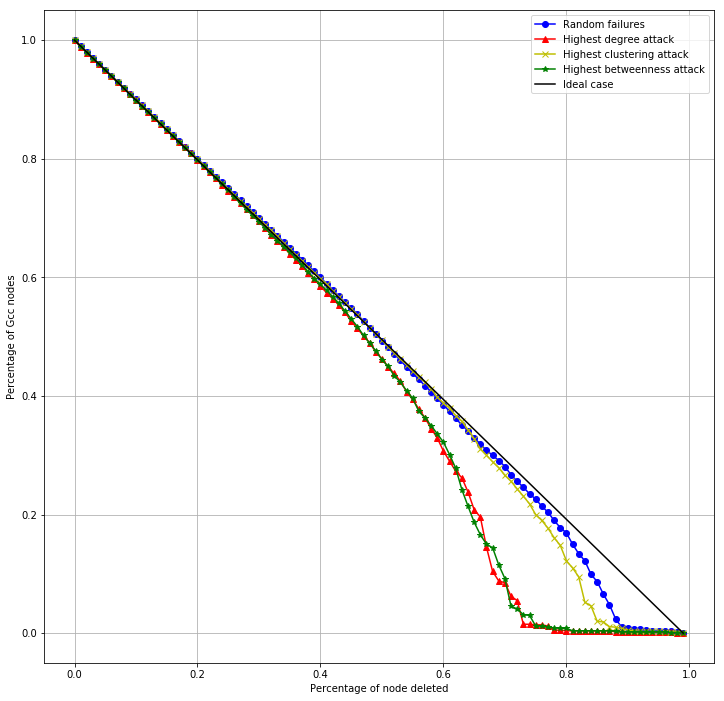

In [262]:
plot_attack(gcc_l1, gcc_l2, gcc_l3, step, "Percentage of Gcc nodes","Percentage of node deleted",1, gcc_l4)

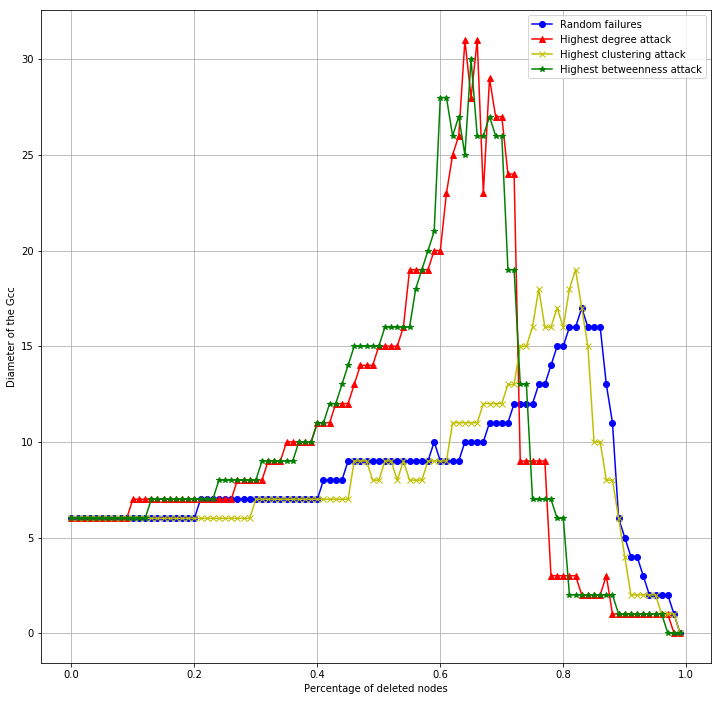

In [346]:
plot_attack(dm_l1, dm_l2, dm_l3, step, "Diameter of the Gcc","Percentage of deleted nodes", 0, dm_l4)

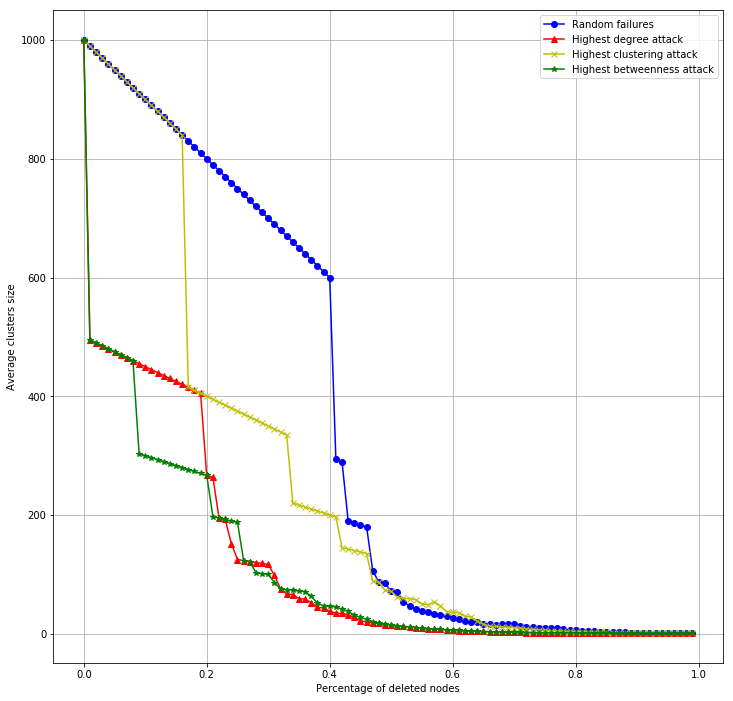

In [345]:
plot_attack(deg_l1, deg_l2, deg_l3, step, "Average clusters size","Percentage of deleted nodes", 0, dm_l4)

## random attack resistance

In [356]:
ER_fc=1-erdos_renyi.order()/(2*erdos_renyi.size())

In [357]:
ER_fc
#since our graph is dense a high percentage of the nodes need to be removed to disconnet the gcc(valid for random failures)

0.899152884227511

In [11]:
K_max=max(barabasi_graph.degree(), key=operator.itemgetter(1))[1]
K_min=min(barabasi_graph.degree(), key=operator.itemgetter(1))[1]
K=abs((2-Y)/(3-Y))*(K_max**(3-Y))*(K_min**(2-Y))#already know 2<Y<3
RA_fc=1-1/(K-1)

NameError: name 'barabasi_graph' is not defined

In [40]:
RA_fc
#scale-free are naturally robust due to few hubs and lots of node with small impact on gcc

0.7968670019589762

In [46]:
#general critical threshold 
k_second=sum([(d**2) for n,d in bitcoin_graph.degree()])/len(bitcoin_graph)# 
k=(2*bitcoin_graph.size()/bitcoin_graph.order())
generic_fc=1-1/(((k_second-k**2)/k)-1) #<k^2>= mean of square minus square of mean
print(generic_fc)


0.9916779292329047


# - Bitcoin Attack

In [8]:
step = 0.01 # 50 nodes at times. takes lot of time

In [15]:
gcc_l1,deg_l1,dm_l1 = attack_graph(bitcoin_graph,np.random.permutation(bitcoin_graph.nodes()),step) 

KeyboardInterrupt: 

In [9]:
gcc_l2,deg_l2,dm_l2 = attack_graph(bitcoin_graph, [x for (x,y) in sorted(bitcoin_graph.degree(), key=operator.itemgetter(1), reverse=True)],step) # 1% passo 1

In [14]:
gcc_l3,deg_l3,dm_l3 = attack_graph(bitcoin_graph, [x for (x,y) in sorted(nx.clustering(bitcoin_graph.to_undirected()).items(), key=operator.itemgetter(1), reverse=True)],step) 

In [21]:
gcc_l4,deg_l4,dm_l4 = attack_graph(bitcoin_graph, [x for (x,y) in sorted(nx.betweenness_centrality(bitcoin_graph).items(), key=operator.itemgetter(1), reverse=True)],step) 

In [70]:
rectify_bound=int(1/step)#our function it's a little bit silly so to actual match range 0-1 in 0.01 step we have to adjust

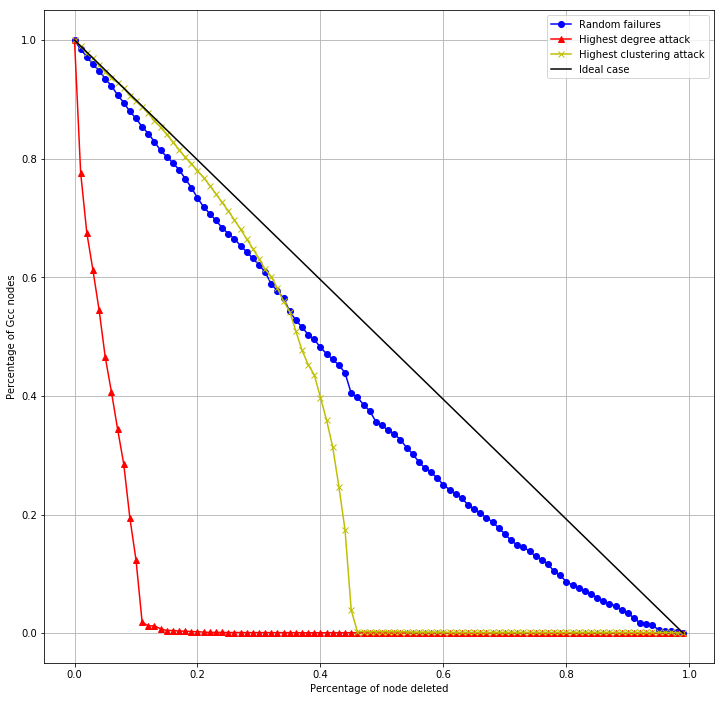

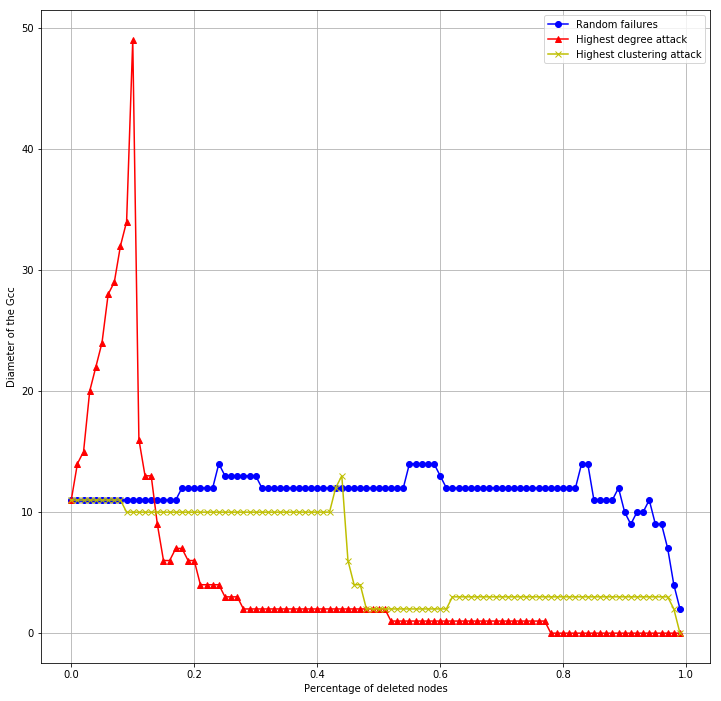

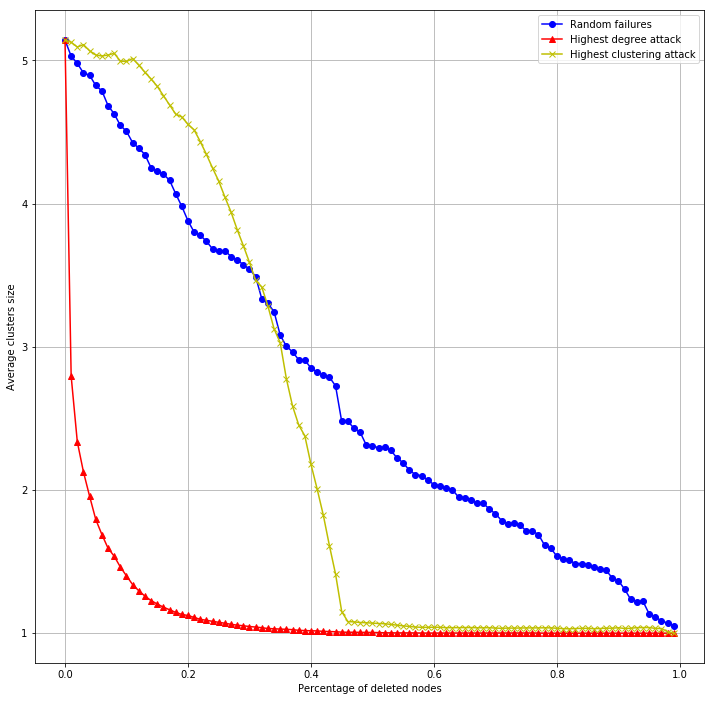

In [71]:
plot_attack(gcc_l1[:rectify_bound], gcc_l2[:rectify_bound], gcc_l3[:rectify_bound], step, "Percentage of Gcc nodes","Percentage of node deleted",1)
plot_attack(dm_l1[:rectify_bound], dm_l2[:rectify_bound], dm_l3[:rectify_bound], step, "Diameter of the Gcc","Percentage of deleted nodes", 0)
plot_attack(deg_l1[:rectify_bound], deg_l2[:rectify_bound], deg_l3[:rectify_bound], step, "Average clusters size","Percentage of deleted nodes", 0)

In [ ]:
#modify plot cause range step could not have same element of plots, generic fc maybe wrong?
#possible code restructuration due to holding same gcc until threshold? try saving G near fc in external var to plot 

# 4th Assignment: Contagion

In [26]:
#initialize status
pa = 2
pb = 4

In [17]:
#functions

def count_attr(blues):
    return len(blues)

def check_convergence(old_c, new_c):
    return (old_c==new_c)

def direct_neighbor(G,node, flag): #flag=1 out edges, 0 in edges
    #print(node)
    return ([neigh[flag] for neigh in (G.in_edges(node) if flag==0 else G.out_edges(node))] \
                if G.is_directed() else G.neighbors(node))


#pick p% of the nodes at random and set their status to B, others go to A
def initialize_random_status(G,p):
    
    N_sel = int(len(G) * p)
    sel_nodes = np.random.permutation(G.node)[:N_sel]# infected nodes 
    
    """between=nx.betweenness_centrality(G, normalized=True)
    clust=nx.clustering(G.to_undirected() if G.is_directed() else G)# manage direct"""
    
    #output_node_stats=list()
    
    for nd in G.nodes:
        if nd in sel_nodes:
            G.node[nd]['status'] = 'B' 
            """block="Node {0}\nDegree: {1}\nClustering Coeff: {2}\nBetweenness: {3}\n" \
             .format(str(nd),str(G.degree(nd)),str(clust[nd]),str(between[nd]))
            output_node_stats.append(block) #visual list of infected nodes"""
            
        else: G.node[nd]['status']= 'A' #infected are B->blue, safe A->red
    return list(sel_nodes)

def update_status(G,node,pa,pb): 
   
    neig_nodes = direct_neighbor(G,node,0)
    payoff = 0
    
    for nd in neig_nodes:
        
        if G.node[nd]['status'] == 'A':
            payoff -= pa #does want to change    
        else:
            payoff += pb #wants to change
    if payoff > 0:
        G.node[node]['status'] = 'B'

def plot_contagion(G, pos,i):
    st_dic = nx.get_node_attributes(G,'status')
    blue_nodes = []
    red_nodes = []
    node_size_list=[]
    
    for x in st_dic:
        if st_dic[x] == 'B':
            blue_nodes.append(x)
            #node_size_list.insert(0,10*G.degree(x))#all blues at the beginning
        else:
            red_nodes.append(x)
            #node_size_list.append(10*G.degree(x)) #all
    
    if G.is_directed():
        node_size_list=[10*G.degree(x) for x in blue_nodes]+[10*G.degree(y) for y in red_nodes]#not working    
        range_blues=len(blue_nodes)
    else:
        node_size_list=[500,500]
        range_blues=-1
        
        
    plt.figure(figsize=(12,10)) 
    nx.draw_networkx_nodes(G,pos,
                           nodelist=red_nodes,#[x for x in G.nodes() if x not in blue_nodes],
                           node_color='r',
                           node_size=node_size_list[range_blues:],
                           alpha=0.6)
    nx.draw_networkx_nodes(G,pos, 
                           nodelist=blue_nodes,
                           node_color='b',
                           node_size=node_size_list[:range_blues],
                           alpha=0.8)
    if not G.is_directed():
        nx.draw_networkx_edges(G, pos, color='green', width=0.3, alpha=0.3)
        nx.draw_networkx_labels(G, pos, labels = st_dic)
    plt.axis('off')
    if not os.path.exists(G.name):#create dir in same place of this file ipython, if there isn't yet
        os.makedirs(G.name)
    plt.savefig(G.name+"/"+str(i)+".png", format="PNG")
    return len(blue_nodes)/float(len(G))
    
def contagion(G,pa, pb, pos, perc_inf):
    new_blues_list=initialize_random_status(G,perc_inf)
    old_blues_list=list()

    i=1 #change name image to save
    
    final_infct=plot_contagion(G, pos, 0)#i=0
    convergence = False

    #until there's no variation
    while not convergence:
        #update all nodes
        
        for nd in new_blues_list:
            for nd_neigh in direct_neighbor(G,nd,1):#only blues neighbors are affected
                update_status(G,nd_neigh,pa,pb)
                
        old_blues_list+=new_blues_list# i don't want to visit these infected again                
        
        #takes only infected not already visited
        new_blues_list=[key for key,status in nx.get_node_attributes(G,'status').items() if status=='B' and\
                        key not in old_blues_list]
        
        #check convergence
        if not new_blues_list:
            convergence = True
        else:
            #plot
            final_infct=plot_contagion(G,pos,i)
            i+=1
    return final_infct
  



# - Erdos-Renyi

In [3]:
G = nx.erdos_random_graph(50, 0.05) #erdos-renyi
G.name='Erdos_Renyi_contagious'
pos = nx.circle_layout(G) #external, so can be reused
#nx.draw(G,pos, with_labels=True)  

NameError: name 'nx' is not defined

0.92


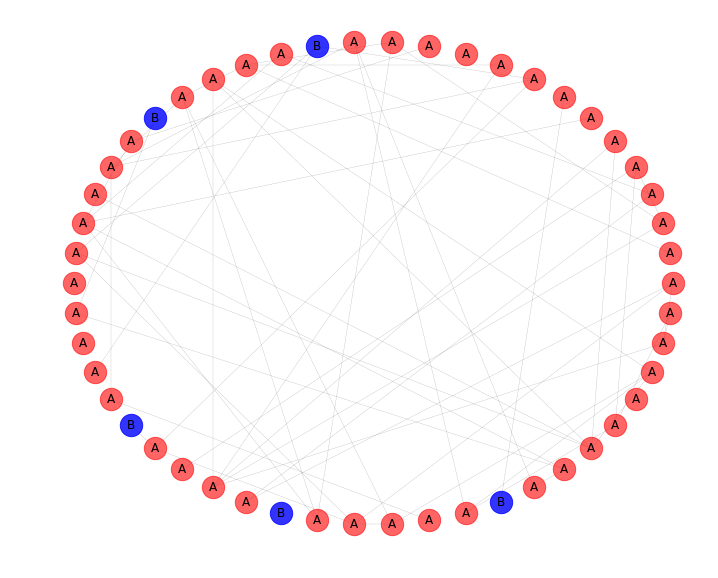

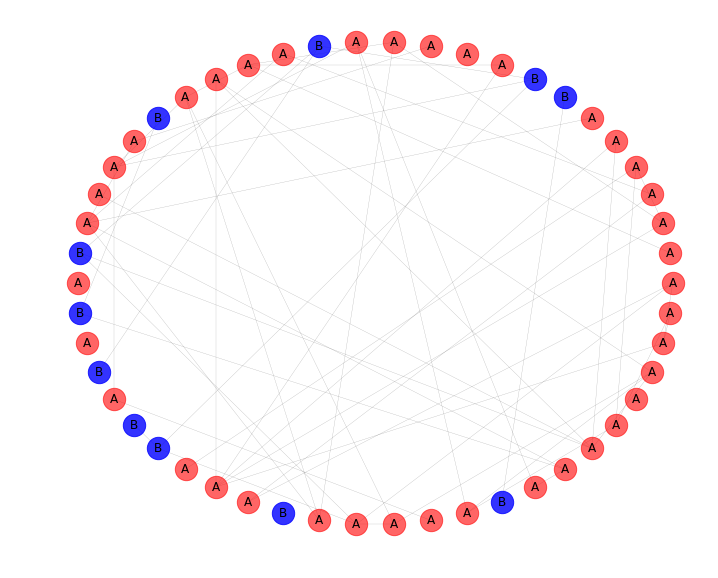

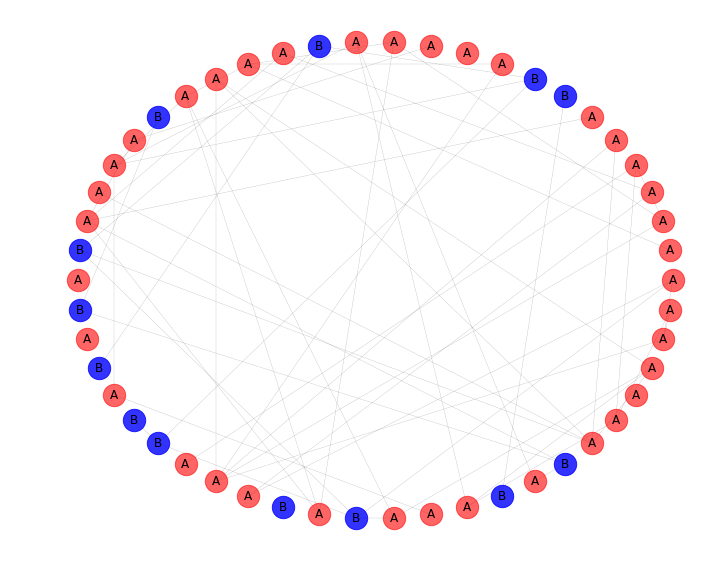

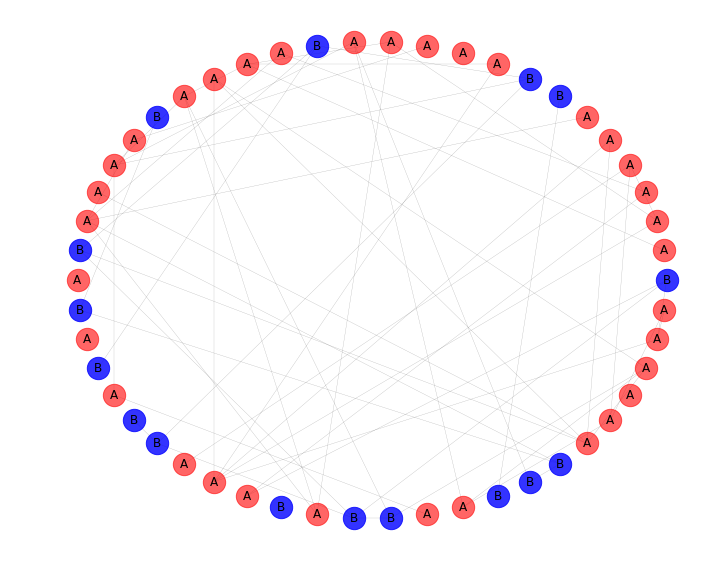

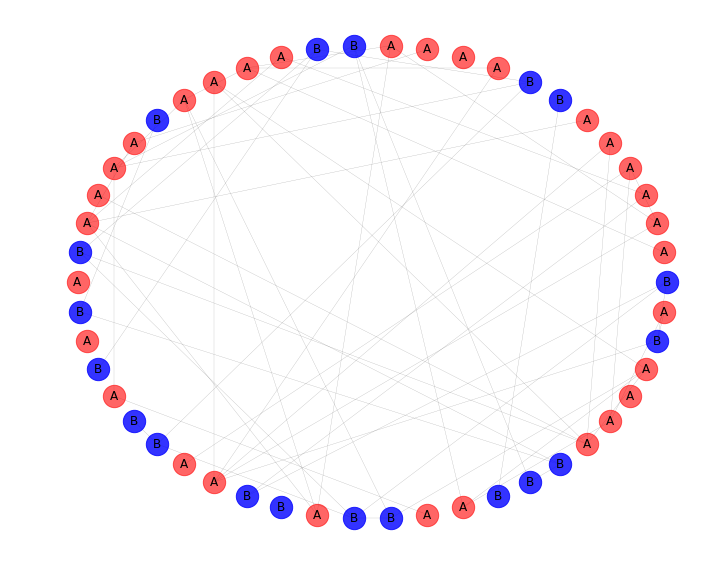

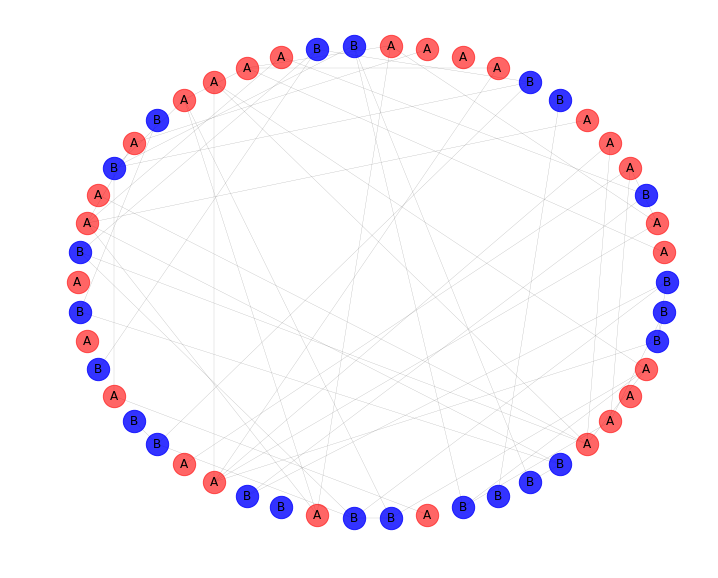

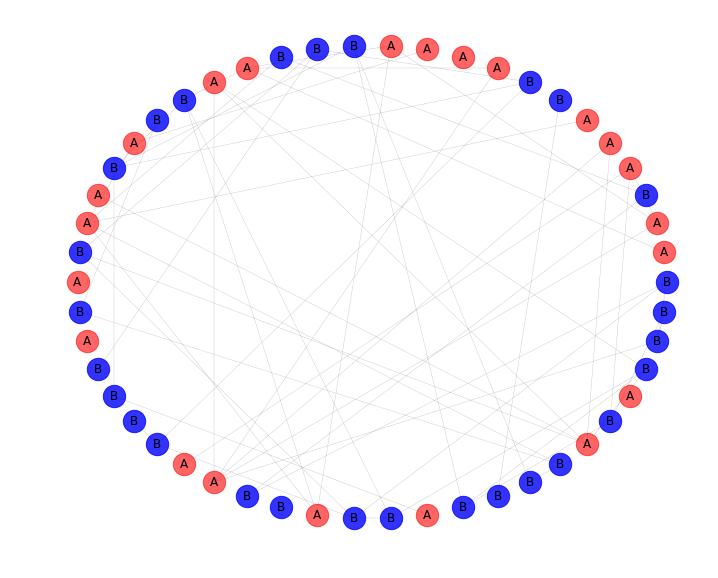

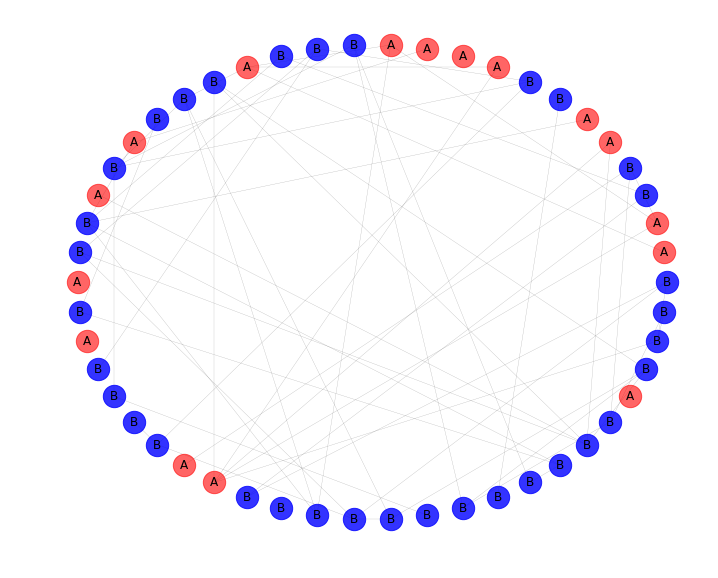

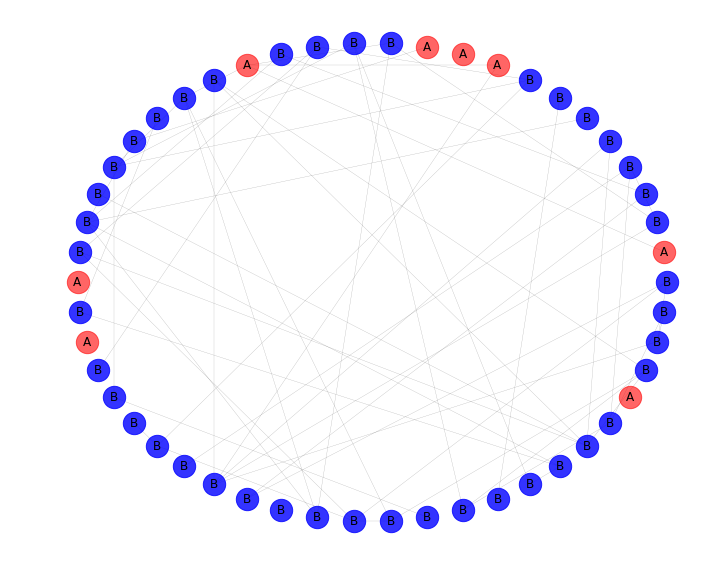

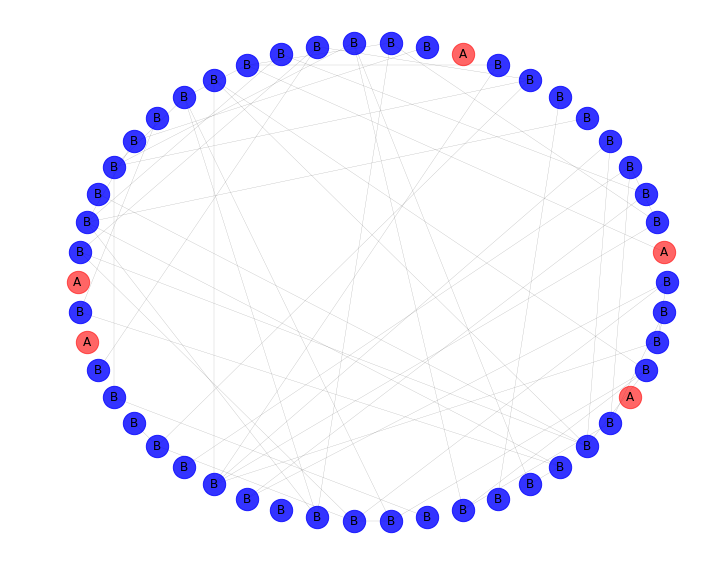

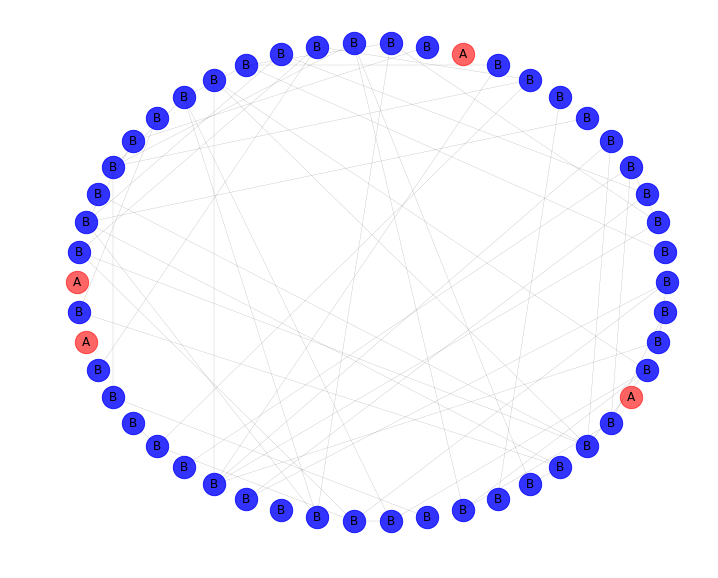

In [21]:
final_infect=contagion(G,pa,pb,pos, 0.1)#0.1 is the intial infected percentage
print(final_infect)

# - Barabasi-Albert

In [178]:
G = nx.barabasi_albert_graph(50,3)
G.name='Barabasi_Albert_contagious'
pos = nx.spring_layout(G) 


[16, 39, 41, 42, 43, 44, 45]
[6, 25, 26, 30, 33, 35, 38, 40]
[1, 2, 3, 5, 7, 8, 9, 13, 14, 24, 31, 32, 36, 46, 47]
[0, 4, 11, 12, 17, 18, 20, 21, 22, 23, 29, 37, 49]
[19, 34]
[]


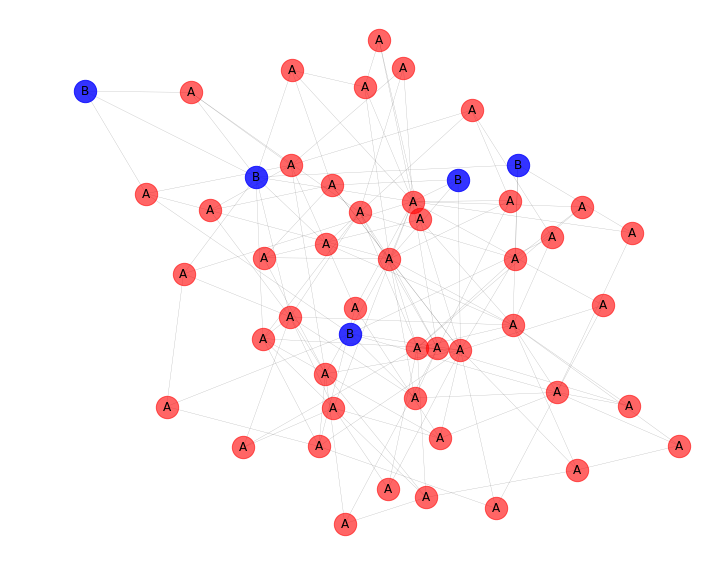

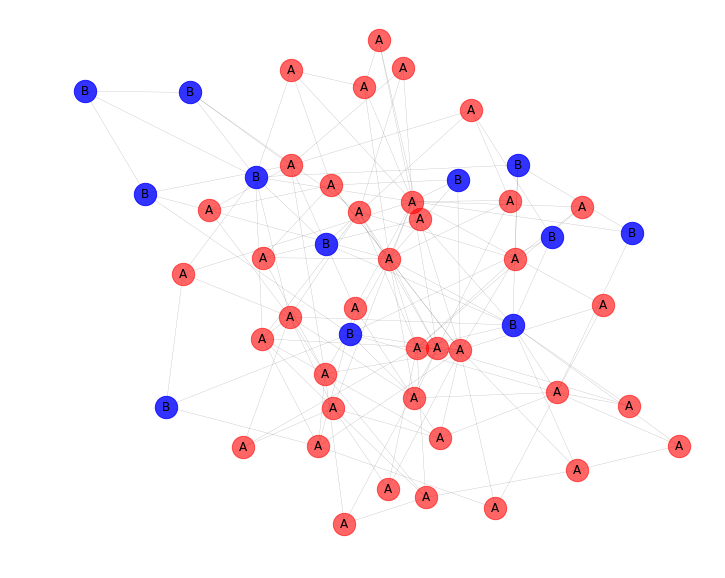

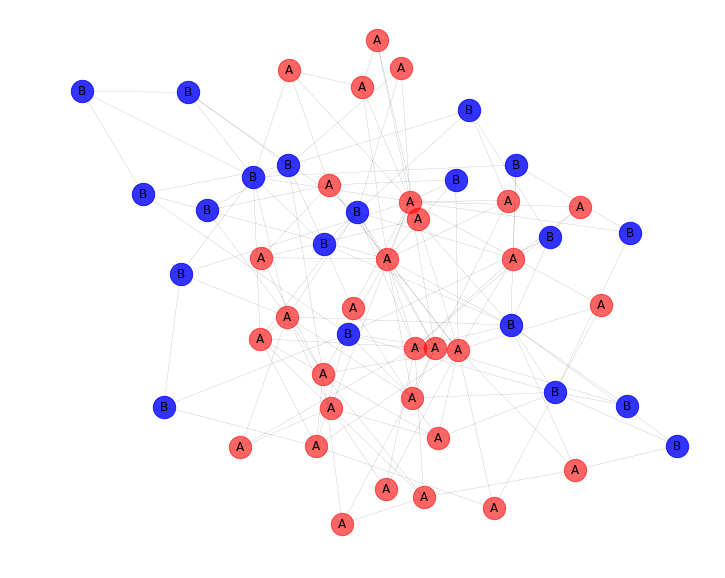

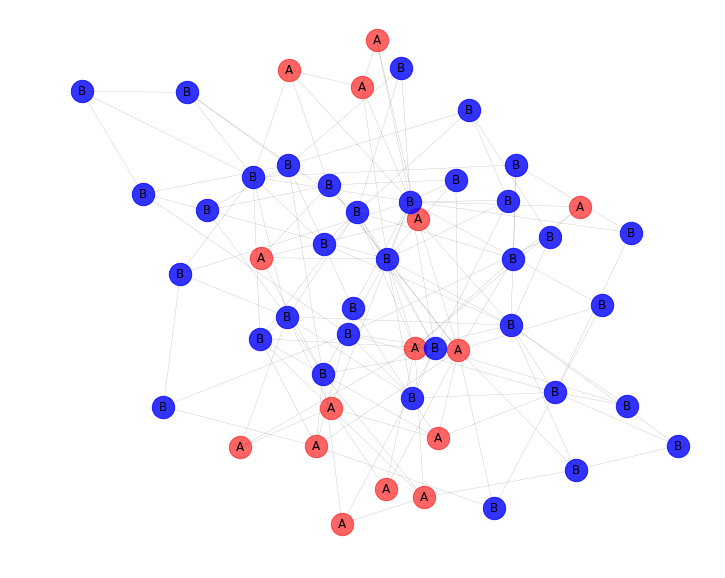

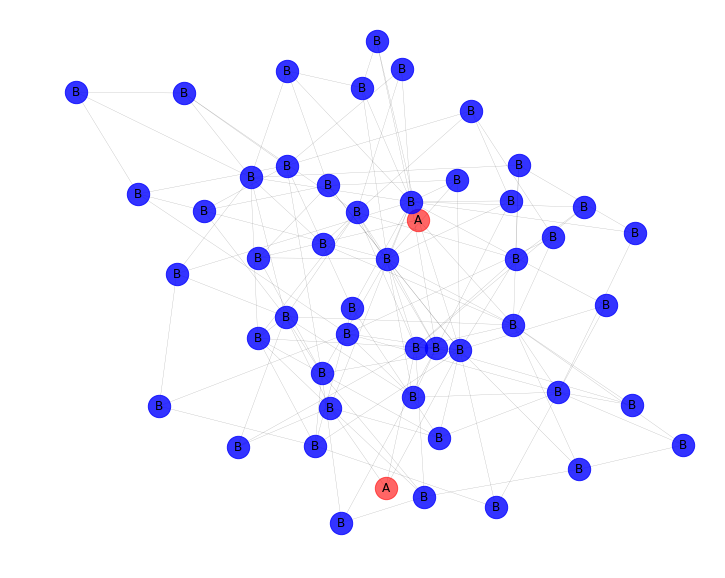

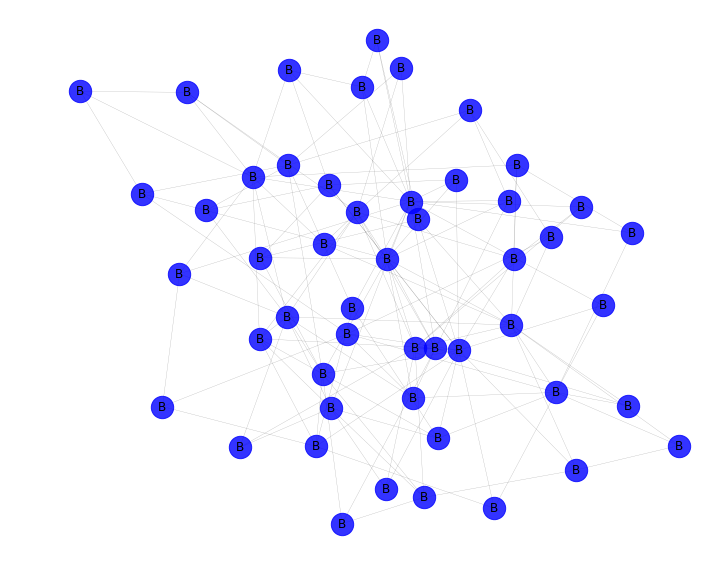

In [179]:
final_infect=contagion(G,pa,pb,pos,0.1)#0.1 percentage of initial infected nodes
print(final_infect)

# - Connected Caveman

In [112]:
G = nx.connected_caveman_graph(10,5)
G.name='Caveman_contagious'
pos = nx.spring_layout(G)

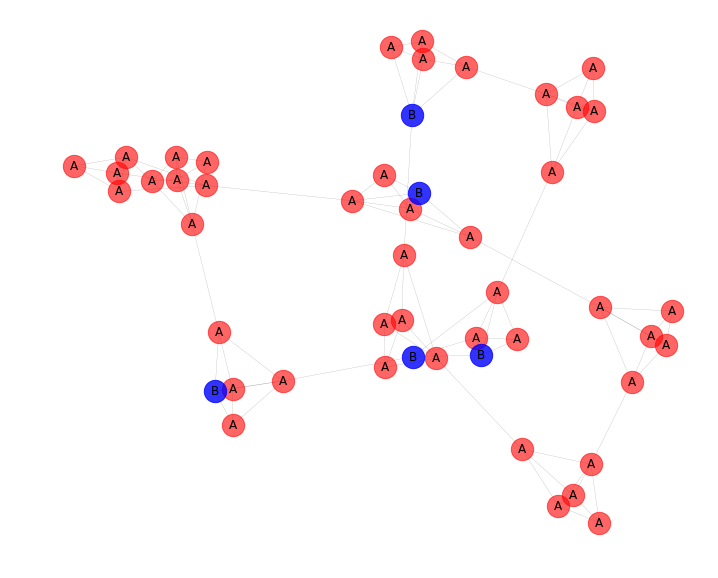

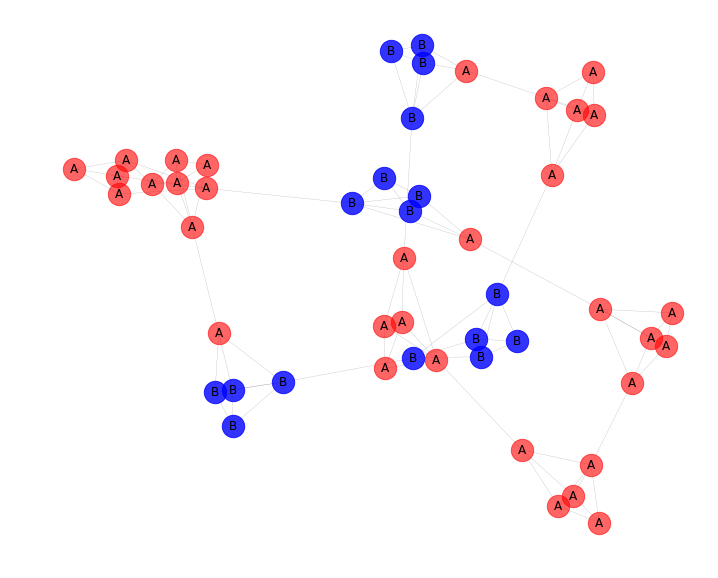

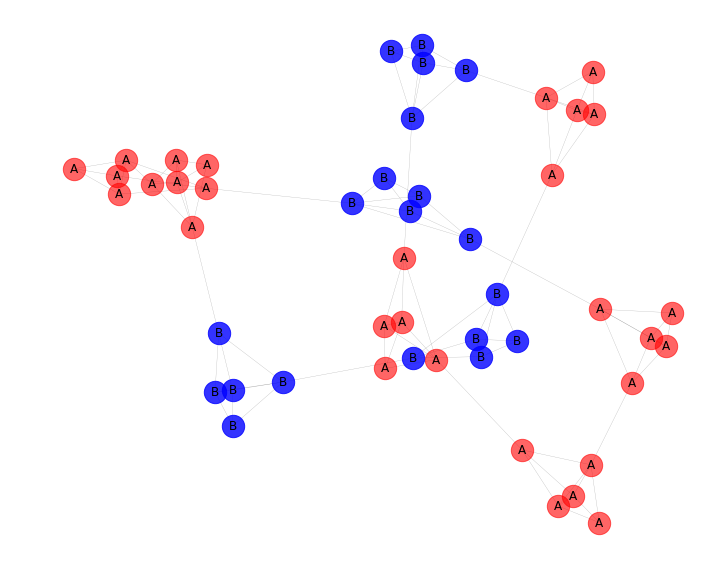

In [113]:
final_infect=contagion(G,pa,pb,pos,0.1)#0.1 percentage of initial infected nodes
print(final_infect)

In [30]:
G1=nx.gnc_graph(1000,None,2)
G1.name='direct_contagious_test'
pos1=nx.spring_layout(G1)

In [32]:
u=[0,9,78,796,586,9]
[10*x for x in u]

[0, 90, 780, 7960, 5860, 90]

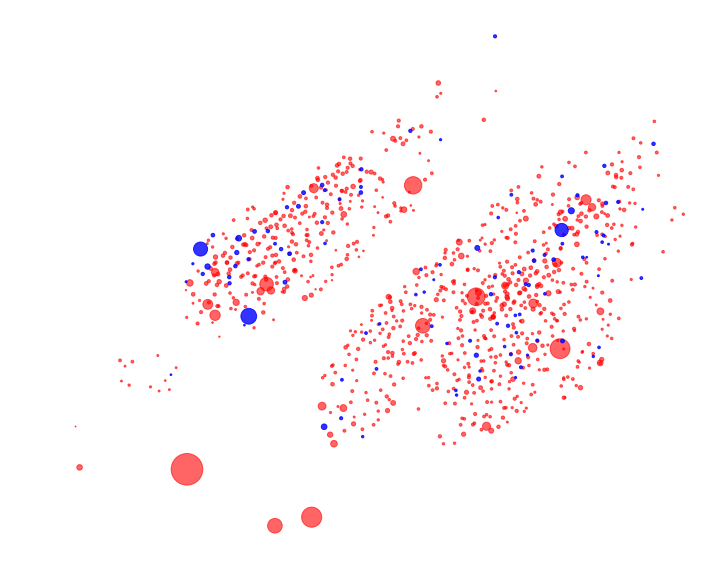

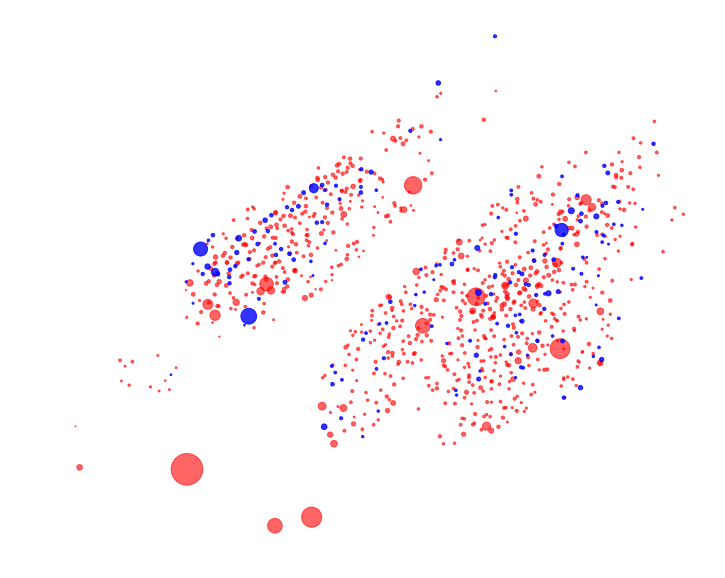

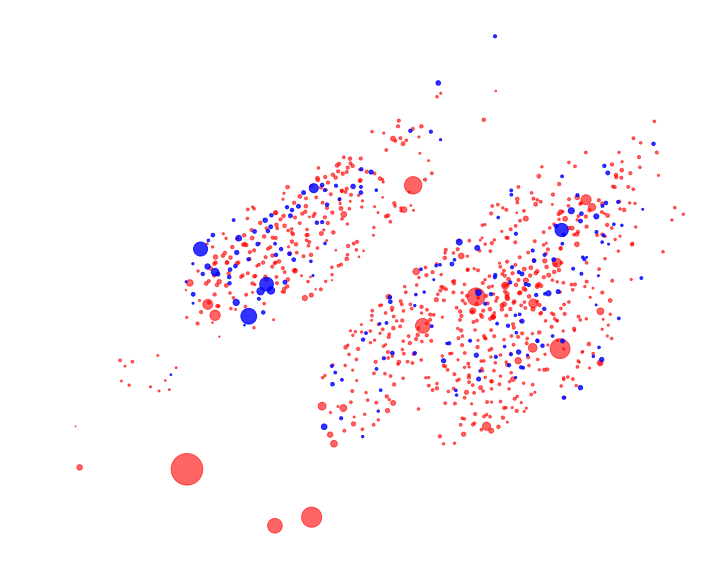

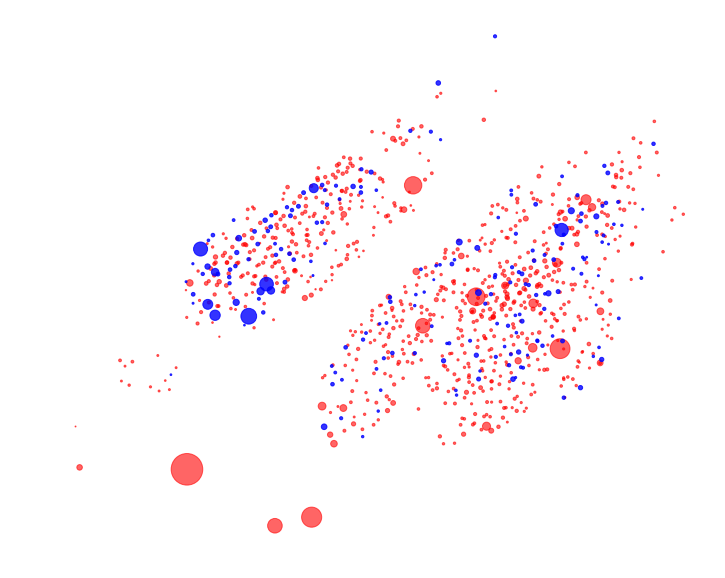

In [33]:
contagion(G1,pa,pb,pos1,0.1)

# - Bitcoin

In [24]:
G=bitcoin_graph
G.name='Bitcoin_contagious'
pos=nx.spring_layout(G)#takes some time

0.18551266791362014


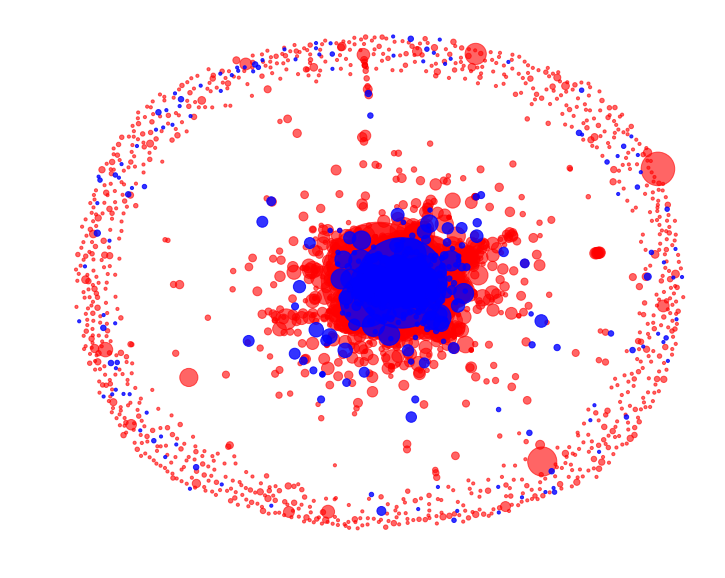

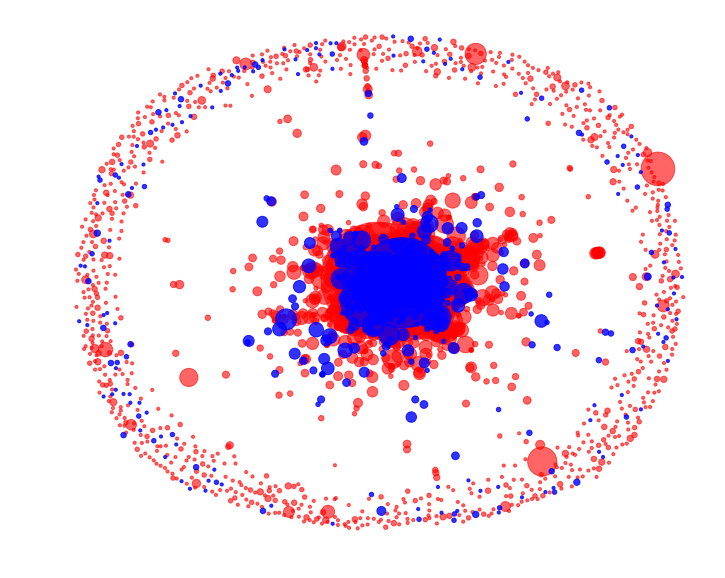

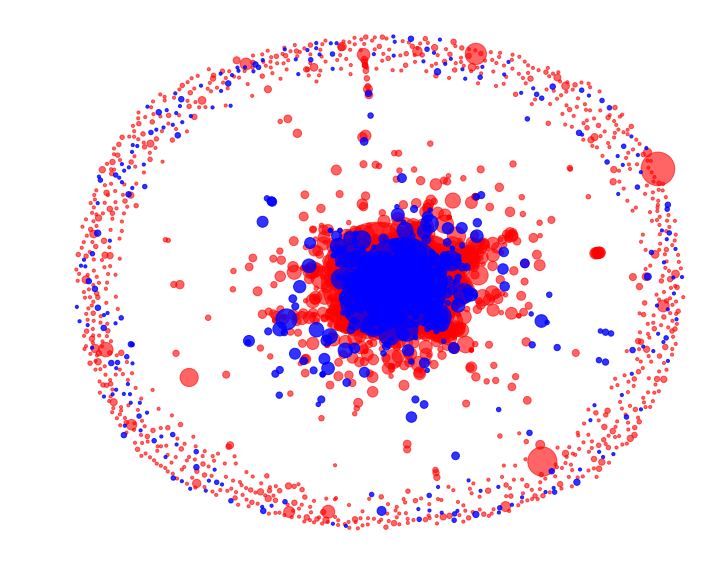

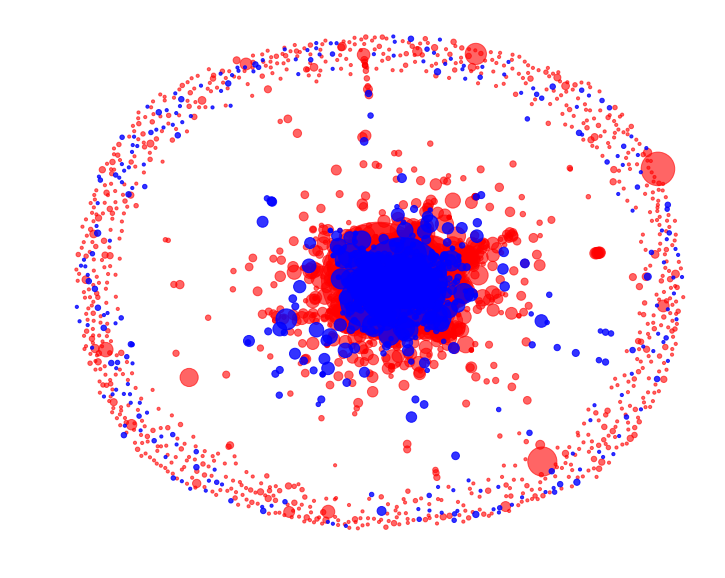

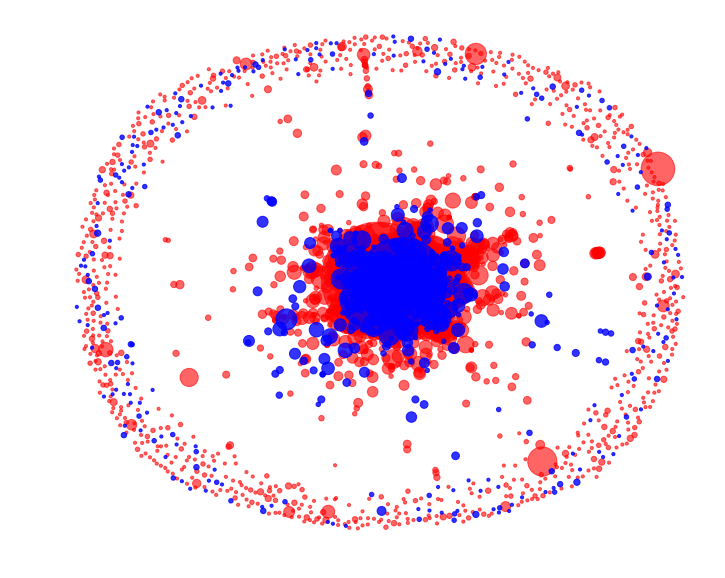

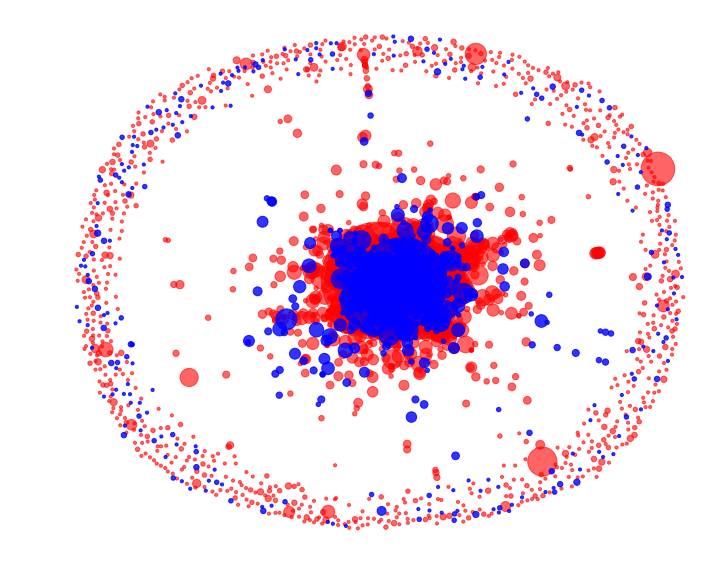

In [31]:
final_infect=contagion(G,pa,pb,pos,0.1)
print(final_infect)